# ML Course 4 - Practice

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
951,2014,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.0,4,AV,X,8.7,6.6,7.8,36,179
658,2014,LEXUS,GS 350,MID-SIZE,3.5,6,AS8,Z,12.1,8.3,10.4,27,239
554,2014,JAGUAR,XFR-S,MID-SIZE,5.0,8,AS8,Z,15.7,10.3,13.3,21,306
189,2014,CHEVROLET,CAMARO,COMPACT,3.6,6,M6,X,14.2,8.6,11.7,24,269
614,2014,KIA,OPTIMA,MID-SIZE,2.4,4,A6,X,10.2,6.8,8.7,32,200
839,2014,NISSAN,FRONTIER,PICKUP TRUCK - SMALL,2.5,4,A5,X,13.7,10.6,12.3,23,283


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.
* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?
* What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?
* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?
* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?
* Bonus (no penalty if not done): Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'])

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:>]], dtype=object)

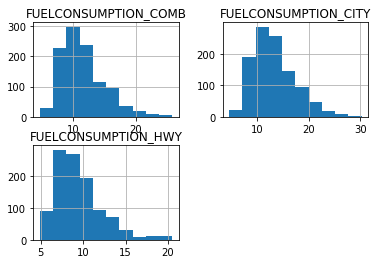

In [119]:
df.hist(['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'])

In [26]:
correlation = df.corr()
correlation

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [27]:
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values.reshape(-1,1)

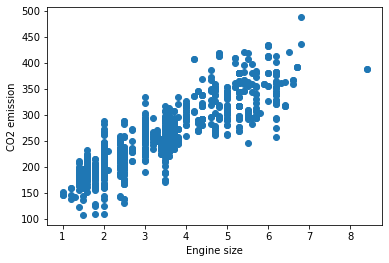

In [28]:
plt.scatter(X, y)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

In [29]:
X = df['CYLINDERS'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values.reshape(-1,1)

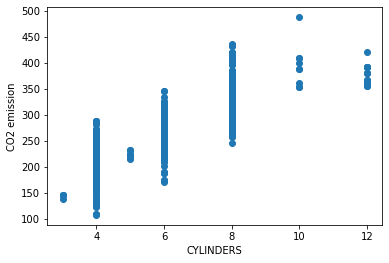

In [30]:
plt.scatter(X, y)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 emission")
plt.show()

In [31]:
X = df['FUELCONSUMPTION_COMB'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values.reshape(-1,1)

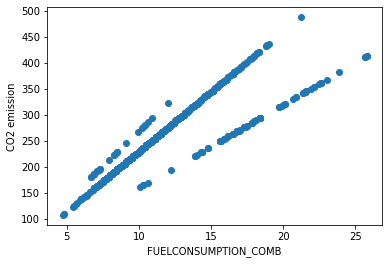

In [32]:
plt.scatter(X, y)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 emission")
plt.show()

In [67]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS'].values.reshape(-1,1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [69]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train['ENGINESIZE'].values.reshape(-1,1), y_train)

LinearRegression()

In [70]:
y_pred = reg1.predict(X_test['ENGINESIZE'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))

Residual sum of squares (RSS): 373781.28


In [71]:
y_pred = reg1.predict(X_test['ENGINESIZE'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


In [74]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*ENGINESIZE + {:.5}*CYLINDERS + {:.5}*FUELCONSUMPTION_COMB".format(reg3.intercept_[0], reg3.coef_[0][0], reg3.coef_[0][1], reg3.coef_[0][1]))

The linear model is: Y = 64.341 + 10.812*ENGINESIZE + 7.9121*CYLINDERS + 7.9121*FUELCONSUMPTION_COMB


In [85]:
RSS = sum((y_pred - y_test)**2)
MSE = np.mean((y_pred - y_test)**2)
MAE = np.mean(abs(y_pred - y_test))
RMSE = (np.mean((y_pred - y_test)))
print(RSS)
print(MSE)
print(MAE)
print(RMSE)

[219936.90839317]
617.8003044752024
18.049332770136637
4.926818160301877


In [94]:
X_train['FUELCONSUMPTION_COMB'].head()

651     17.3
304     12.8
883     11.9
994     11.3
1027     9.8
Name: FUELCONSUMPTION_COMB, dtype: float64

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train['FUELCONSUMPTION_COMB'].values.reshape(-1,1))

X_train_poly = pd.DataFrame(X_train_poly)
X_train_poly.columns = poly.get_feature_names()

In [43]:
X_train_poly[:5]

,x0,x0^2,x0^3,x0^4,x0^5
0,17.3,299.29,5177.717,89574.5041,1.549639e+06
1,12.8,163.84,2097.152,26843.5456,3.435974e+05
2,11.9,141.61,1685.159,20053.3921,2.386354e+05
3,11.3,127.69,1442.897,16304.7361,1.842435e+05
4,9.8,96.04,941.192,9223.6816,9.039208e+04


In [44]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [108]:
correlation2 = df[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']].corr()
print(correlation2)

                      FUELCONSUMPTION_COMB  FUELCONSUMPTION_CITY  \
FUELCONSUMPTION_COMB              1.000000              0.995542   
FUELCONSUMPTION_CITY              0.995542              1.000000   
FUELCONSUMPTION_HWY               0.985804              0.965718   

                      FUELCONSUMPTION_HWY  
FUELCONSUMPTION_COMB             0.985804  
FUELCONSUMPTION_CITY             0.965718  
FUELCONSUMPTION_HWY              1.000000  


In [87]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y = df['CO2EMISSIONS'].values.reshape(-1,1)

In [89]:
reg4 = LinearRegression()
reg4.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*ENGINESIZE + {:.5}*CYLINDERS + {:.5}*FUELCONSUMPTION_COMB  + {:.5}*FUELCONSUMPTION_CITY + {:.5}*FUELCONSUMPTION_HWY".format(reg4.intercept_[0], reg4.coef_[0][0], reg4.coef_[0][1], reg4.coef_[0][1],reg4.coef_[0][0], reg4.coef_[0][1]))

The linear model is: Y = 64.341 + 10.812*ENGINESIZE + 7.9121*CYLINDERS + 7.9121*FUELCONSUMPTION_COMB  + 10.812*FUELCONSUMPTION_CITY + 7.9121*FUELCONSUMPTION_HWY
